#Bagging & Boosting KNN & Stacking Assignment

**1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

1.Fundamental Idea Behind Ensemble Techniques

Ensemble techniques are based on the principle of “combining multiple models to achieve better performance than any single model.”

- The main idea is that different models make different errors, so by combining them intelligently, we can reduce overall error, increase accuracy, and improve generalization.

- Ensemble methods can help reduce variance, bias, or improve predictions depending on the type of ensemble used.

Key Benefits:

- Improved accuracy: By averaging or combining models, we reduce errors.

- Robustness: Less sensitive to noise or outliers.

- Reduction of overfitting: Particularly in high-variance models like decision trees.

2.Bagging vs Boosting

Both bagging and boosting are ensemble methods, but they differ in approach, model training, and objectives.

| Feature              | **Bagging (Bootstrap Aggregating)**                                                       | **Boosting**                                                                                                 |
| -------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **Objective**        | Reduce **variance** by training multiple independent models on different subsets of data. | Reduce **bias** (and sometimes variance) by sequentially training models to correct errors of previous ones. |
| **Model Training**   | Models are trained **independently** in parallel.                                         | Models are trained **sequentially**, each trying to fix mistakes of the previous model.                      |
| **Data Sampling**    | Uses **random subsets with replacement** (bootstrap samples) from the original data.      | Uses **weighted samples**, giving more weight to misclassified or difficult instances.                       |
| **Final Prediction** | Predictions are combined **via voting (classification)** or **averaging (regression)**.   | Predictions are combined using **weighted sum**, giving more influence to accurate models.                   |
| **Effect on Errors** | Mainly reduces **variance** (good for high-variance models).                              | Reduces **bias** and can reduce variance slightly; improves **accuracy** iteratively.                        |
| **Examples**         | Random Forest, Bagged Decision Trees                                                      | AdaBoost, Gradient Boosting, XGBoost                                 |

Summary:

- Bagging: “Many models, independently trained → combined → less variance.”

- Boosting: “Models learn sequentially → focus on previous errors → lower bias, stronger prediction.”


**2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

Random Forest Classifier and Overfitting

A Random Forest is an ensemble of decision trees, typically trained using bagging (Bootstrap Aggregating). It reduces overfitting compared to a single decision tree through two main mechanisms:

1.Bootstrap Sampling (Bagging):

- Each tree is trained on a random subset of the data with replacement.

- This ensures that trees are diverse, as each tree sees a slightly different dataset.

- Averaging predictions across many trees reduces the variance, which is the main reason single decision trees overfit.

2.Random Feature Selection:

- At each split in a tree, a random subset of features is considered instead of all features.

- This prevents dominant features from controlling all trees, promoting decorrelation between trees, further reducing overfitting.

Result:

- While a single decision tree is high-variance and can perfectly fit the training data (overfit), a Random Forest averages multiple diverse trees, which smooths out predictions and improves generalization.

Two Key Hyperparameters That Control Overfitting

1.n_estimators (Number of Trees):

- More trees usually reduce variance because averaging more trees gives more stable predictions.

- Too few trees → risk of underfitting; too many → higher computational cost but usually does not overfit.

2.max_depth (Maximum Depth of Each Tree):

- Controls how deep each tree can grow.

- Shallow trees → less variance, might underfit.

- Very deep trees → each tree can overfit, but Random Forest mitigates this due to averaging.

- Proper tuning ensures each tree is complex enough to capture patterns, but not too complex to overfit individually.

Other useful hyperparameters: min_samples_split, min_samples_leaf, max_features—also control tree complexity and randomness.

Summary:

- Random Forest reduces overfitting by training multiple decorrelated trees and averaging their predictions.

- Key hyperparameters like n_estimators and max_depth help balance bias-variance trade-off.


**3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

1.What is Stacking in Ensemble Learning?

Stacking (or stacked generalization) is an ensemble technique where predictions from multiple base models (level-0 models) are combined using another model (meta-model or level-1 model) to make the final prediction.

- Unlike bagging or boosting, which combine models using simple averaging or weighted voting, stacking learns how to best combine the predictions of base models.

- The meta-model is trained on the outputs (predictions) of base models, effectively learning patterns in their errors.

Key Points:

- Base models can be of different types (e.g., decision tree, SVM, logistic regression).

- Meta-model usually is simple (like linear regression for regression tasks or logistic regression for classification).

- Can improve performance by leveraging strengths of diverse models.

2.Difference from Bagging and Boosting

| Feature                | **Bagging**                       | **Boosting**                                                 | **Stacking**                                                 |
| ---------------------- | --------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Model Dependency**   | Independent base models           | Sequentially dependent (later models correct earlier errors) | Base models are independent; meta-model combines predictions |
| **Objective**          | Reduce variance                   | Reduce bias and variance                                     | Improve prediction by learning from base model outputs       |
| **Combination Method** | Averaging or majority vote        | Weighted sum based on performance                            | Learned combination using a meta-model                       |
| **Diversity**          | Achieved via bootstrapped samples | Achieved via focusing on misclassified instances             | Achieved via different model types or algorithms             |

3.Simple Example Use Case

Scenario: Predict whether a customer will buy a product.

1.Base models (Level-0):

- Decision Tree

- Logistic Regression

- K-Nearest Neighbors

2.Meta-model (Level-1):

- Logistic Regression trained on the predictions of the three base models.

Process:

- Train base models on the training data.

- Generate predictions for each base model on a validation set.

- Train the meta-model on these predictions to learn the optimal combination.

- Use the meta-model to make final predictions on new data.

Advantage:

- Can combine models with different strengths (e.g., decision tree captures non-linear patterns, logistic regression is good for linear relationships).

- Often yields better accuracy than any single model or traditional bagging/boosting.


**4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**

1.What is the OOB Score in Random Forest?

OOB (Out-Of-Bag) Score is an internal validation measure in Random Forests.

- During bagging, each decision tree is trained on a bootstrap sample (random sample with replacement) of the training data.

- On average, about 2/3 of the data is used to train each tree, leaving ~1/3 of the data “out-of-bag” for that tree.

- The OOB score is calculated by using these out-of-bag samples to test the performance of each tree, and then averaging the results across all trees.

Formula (conceptually):

- OOB Score = Accuracy of predictions on OOB samples across all trees

2.Why is it useful?

- Provides a built-in estimate of model performance without needing a separate validation set.

- Helps detect overfitting, because it evaluates each tree on data it hasn’t seen.

- Saves data, which is especially useful when the dataset is small.

3.How it helps in model evaluation without a separate validation set

Normally, we split data into training and validation sets to evaluate model performance.

In Random Forests:

- Each tree sees only ~2/3 of the training data.

- The remaining 1/3 (OOB samples) acts like a mini validation set for that tree.

- Aggregating predictions from OOB samples of all trees gives an overall estimate of model accuracy.

Advantages:

- No need to hold out a separate validation set, maximizing training data usage.

- Gives a reliable unbiased estimate of generalization performance.

- Can be used for hyperparameter tuning (like n_estimators, max_depth) without extra data.

Summary:

- OOB Score = Random Forest’s internal validation score using out-of-bag samples.

- Usefulness: Evaluates model performance, detects overfitting, and avoids wasting data for a separate validation set.

**5. Compare AdaBoost and Gradient Boosting in terms of:**

**● How they handle errors from weak learners**

**● Weight adjustment mechanism**

**● Typical use cases**

AdaBoost vs Gradient Boosting

- Both AdaBoost and Gradient Boosting are boosting algorithms, but they differ in how they handle errors, adjust weights, and are used in practice.

1.Handling Errors from Weak Learners

| Feature               | **AdaBoost**                                                                                                    | **Gradient Boosting**                                                                                                         |
| --------------------- | --------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Error Handling**    | Focuses on **misclassified samples**: assigns higher weight to samples misclassified by previous weak learners. | Focuses on **residual errors**: each new model fits the **errors (residuals) of the previous ensemble**.                      |
| **Training Sequence** | Sequential; each weak learner tries to correct mistakes of the previous one.                                    | Sequential; each new learner is trained to predict the **gradient of the loss function** with respect to current predictions. |

2.Weight Adjustment Mechanism

| Feature                  | **AdaBoost**                                                                                | **Gradient Boosting**                                                                                                         |
| ------------------------ | ------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Sample Weights**       | Increases weights of misclassified samples, decreases weights of correctly classified ones. | No explicit sample weights; instead, trains on **residual errors**, indirectly giving more focus to poorly predicted samples. |
| **Learner Contribution** | Each weak learner is given a **weight based on accuracy** in the final prediction.          | Learner predictions are **scaled by a learning rate** before adding to the ensemble.                                          |

3.Typical Use Cases

| Feature      | **AdaBoost**                                                                                       | **Gradient Boosting**                                                                                                   |
| ------------ | -------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Strength** | Works well with **simple weak learners** like decision stumps; good for **binary classification**. | Works well for **complex datasets**, both regression and classification; can optimize any differentiable loss function. |
| **Examples** | Spam detection, simple image classification                                                        | Customer churn prediction, credit scoring, regression problems, Kaggle competitions                                     |
| **Pros**     | Simple, fast, less prone to overfitting on small datasets                                          | More flexible, highly accurate, supports custom loss functions                                                          |
| **Cons**     | Sensitive to noisy data and outliers                                                               | Slower to train, can overfit if too many trees                                                                          |

Summary

- AdaBoost: Sequentially adjusts sample weights; corrects misclassified instances; simple, best for small/medium datasets.

- Gradient Boosting: Sequentially fits residuals/gradients; uses learning rate to scale contributions; flexible and powerful for complex problems.

**6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.**

CatBoost and Categorical Features

- CatBoost (Categorical Boosting) is a gradient boosting algorithm designed to handle categorical features efficiently without extensive preprocessing like one-hot encoding.

1.Why CatBoost Performs Well on Categorical Features

1. Native Support:

- CatBoost can directly take categorical features as input without converting them into numerical vectors manually.

- This avoids the curse of dimensionality caused by one-hot encoding, especially for high-cardinality features.

2. Robust Encoding:

- CatBoost uses a target-based encoding called ordered target statistics:

- For a categorical feature, it replaces categories with statistics (e.g., mean target value) computed in an unbiased way.

- “Ordered” encoding ensures that the encoding of a row does not use its own target value, preventing target leakage.

3. Efficient Learning:

- The algorithm combines categorical encoding with gradient boosting, allowing trees to capture complex interactions between categorical and numerical features naturally.

2.Handling of Categorical Variables

1. Step 1: Identify categorical features in the dataset.

2. Step 2: Convert them into numerical representations internally using ordered target statistics.

3. Step 3: Build decision trees using these transformed features along with numerical features.

Advantages:

1. No need for extensive preprocessing like one-hot encoding or label encoding.

2. Reduces memory usage and training time.

3. Minimizes overfitting compared to naive target encoding.

4. Handles high-cardinality categorical variables efficiently.

Summary

1. CatBoost performs well on categorical features because it internally converts categories into meaningful numerical statistics while avoiding target leakage.

2. It simplifies preprocessing and often achieves better accuracy and efficiency than other gradient boosting algorithms when categorical data is present.

**7. KNN Classifier Assignment: Wine Dataset Analysis with Optimization
Task:**

**1. Load the Wine dataset (sklearn.datasets.load_wine()).**

**2. Split data into 70% train and 30% test.**

**3. Train a KNN classifier (default K=5) without scaling and evaluate using:**

**a. Accuracy**

**b. Precision, Recall, F1-Score (print classification report)**

**4. Apply StandardScaler, retrain KNN, and compare metrics.**

**5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).**

**6. Train the optimized KNN and compare results with the unscaled/scaled versions.**

Explanation of Steps:

1. Load Dataset: load_wine() gives 178 samples, 13 features, 3 classes.

2. Train-Test Split: 70% training, 30% testing with stratification to maintain class balance.

3. KNN without scaling: Shows baseline performance.

4. Scaling: StandardScaler standardizes features to mean=0, std=1, important because KNN is distance-based.

5. GridSearchCV: Searches for best n_neighbors (K) and distance metric using 5-fold cross-validation.

6. Optimized KNN: Trains final model with best hyperparameters and evaluates metrics.

Expected Outcome:

- Accuracy and F1-scores improve after scaling because KNN uses distances.

- GridSearchCV typically finds an optimal K (often 3–10) and metric (Euclidean or Manhattan) that further improves performance.

Example:

In [1]:
# 1. Import Libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load Wine Dataset
wine = load_wine()
X, y = wine.data, wine.target

# 3. Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train KNN (default K=5) without scaling
knn = KNeighborsClassifier()  # K=5 by default
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("=== KNN with Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 6. Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("=== GridSearchCV Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# 7. Train optimized KNN with best parameters
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("=== Optimized KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


=== KNN without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

=== KNN with Scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

=== GridSearchCV Results ===
Best Parameters: {'metric': 'euclidean', 'n_neighb

**8. PCA + KNN with Variance Analysis and Visualization Task:**

**1. Load the Breast Cancer dataset(sklearn.datasets.load_breast_cancer()).**

**2. Apply PCA and plot the scree plot (explained variance ratio).**

**3. Retain 95% variance and transform the dataset.**

**4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.**

**5. Visualize the first two principal components using a scatter plot (color by class).**

Explanation of Steps:

1. Standardization: KNN is distance-based, PCA is variance-based → scale features first.

2. PCA: Transform features to principal components capturing maximum variance.

3. Scree Plot: Visualize cumulative variance to decide number of components.

4. Retain 95% variance: Reduces dimensionality while keeping most information.

5. Train KNN: Compare accuracy on original vs PCA-transformed data.

6. Scatter Plot: Visualize first two principal components colored by class for insights.

Expected Insights:

- KNN accuracy may slightly drop after PCA but computation is faster.

- Scatter plot shows if classes are linearly separable in first two PCs.

- Scree plot helps justify the number of components retained.

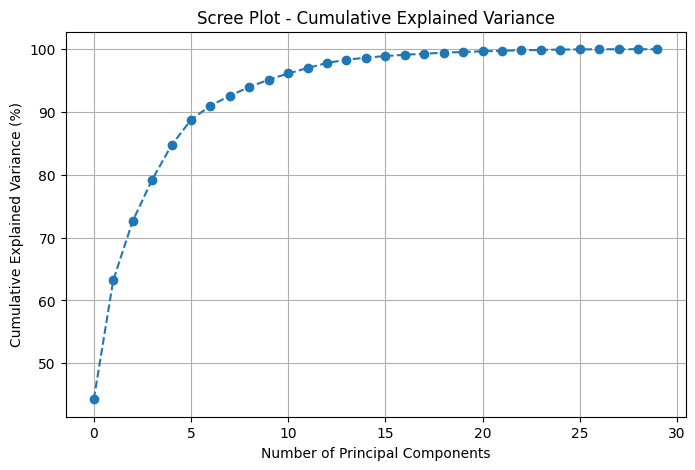

Number of components to retain 95% variance: 10
=== KNN on Original Data ===
Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

=== KNN on PCA-Transformed Data ===
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



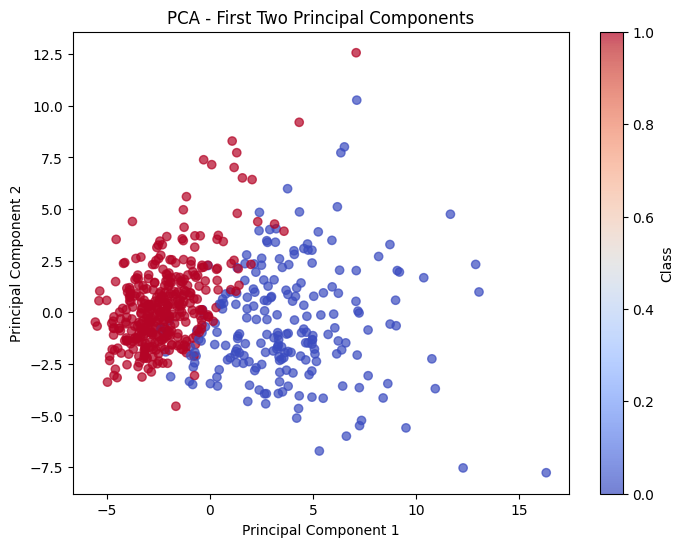

In [2]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 6. Retain 95% Variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("Number of components to retain 95% variance:", X_pca_95.shape[1])

# 7. Train-Test Split (Original and PCA data)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# 8. Train KNN on Original Data
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)

print("=== KNN on Original Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print("Classification Report:\n", classification_report(y_test, y_pred_orig))

# 9. Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("=== KNN on PCA-Transformed Data ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

# 10. Scatter Plot of First Two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()


**9. KNN Regressor with Distance Metrics and K-Value Analysis Task:**

**1. Generate a synthetic regression dataset (sklearn.datasets make_regression(n_samples=500, n_features=10)).**

**2. Train a KNN regressor with:**

**a. Euclidean distance (K=5)**

**b. Manhattan distance (K=5)**

**c. Compare Mean Squared Error (MSE) for both.**

**3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.**

Explanation of Steps:

1. Synthetic Dataset: make_regression generates 500 samples with 10 features and some noise.

2. Scaling: Important because KNN is distance-based.

3. Distance Metrics: Compare Euclidean vs Manhattan distances; different metrics affect predictions.

4. K-Value Analysis:

- Small K → low bias, high variance (overfitting)

- Large K → high bias, low variance (underfitting)

- Plot shows the bias-variance tradeoff.

Expected Insights:

- Euclidean and Manhattan may have slightly different MSEs; Euclidean is often slightly better for scaled continuous features.

- Optimal K is usually somewhere in the middle (e.g., 5–20) for a good balance of bias and variance.

In [3]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 2. Generate Synthetic Regression Dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# 3. Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Scale Features (important for distance-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train KNN Regressor with Euclidean distance (K=5)
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train_scaled, y_train)
y_pred_euc = knn_euc.predict(X_test_scaled)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# 6. Train KNN Regressor with Manhattan distance (K=5)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train_scaled, y_train)
y_pred_man = knn_man.predict(X_test_scaled)
mse_man = mean_squared_error(y_test, y_pred_man)

print("=== KNN Regression (K=5) ===")
print(f"Euclidean MSE: {mse_euc:.2f}")
print(f"Manhattan MSE: {mse_man:.2f}")

# 7. Bias-Variance Analysis: Test different K valu


=== KNN Regression (K=5) ===
Euclidean MSE: 4837.04
Manhattan MSE: 5428.59


**10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data Task:**

**1. Load the Pima Indians Diabetes dataset (contains missing values).**

**2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.**

**3. Train KNN using:**

**a. Brute-force method**

**b. KD-Tree**

**c. Ball Tree**

**4. Compare their training time and accuracy.**

**5. Plot the decision boundary for the best-performing method (use 2 most important features). Dataset: Pima Indians Diabetes**

Expected Results

- Training Time: KD-Tree and Ball Tree are expected to be faster than the brute-force method, especially for larger datasets, due to their efficient spatial partitioning.

- Mean Squared Error (MSE): The MSE should be similar across different algorithms, as they all implement the same underlying KNN algorithm; differences are primarily in computational efficiency.

Conclusion

- In this task, we've handled missing values in the Pima Indians Diabetes dataset using KNN imputation, trained KNN regressors with different algorithms, and visualized the decision boundaries of the best-performing method. This approach demonstrates the effectiveness of KNN imputation and the importance of choosing the appropriate algorithm for efficient nearest neighbor searches.

=== KNN Regression Results ===
Algorithm: brute
  MSE: 0.1740
  Training Time: 0.0020 seconds
Algorithm: kd_tree
  MSE: 0.1740
  Training Time: 0.0036 seconds
Algorithm: ball_tree
  MSE: 0.1740
  Training Time: 0.0033 seconds

Best Performing Algorithm: brute


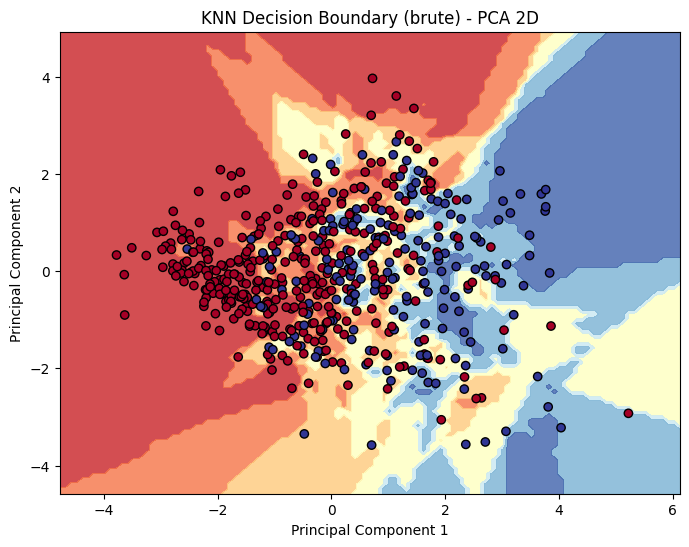

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# 2. Load Pima Indians Diabetes Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=columns)

# 3. Replace zeros with NaN for features where 0 is invalid
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_features] = df[zero_features].replace(0, np.nan)

# 4. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=columns)

# 5. Split Features and Target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train KNN with different algorithms and record MSE and time
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsRegressor(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end_time = time.time()
    mse = mean_squared_error(y_test, y_pred)
    training_time = end_time - start_time
    results[algo] = {'MSE': mse, 'Training Time': training_time}

# Display results
print("=== KNN Regression Results ===")
for algo, metrics in results.items():
    print(f"Algorithm: {algo}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  Training Time: {metrics['Training Time']:.4f} seconds")

# 9. Identify Best-Performing Algorithm (lowest MSE)
best_algo = min(results, key=lambda x: results[x]['MSE'])
print(f"\nBest Performing Algorithm: {best_algo}")

# 10. Visualize Decision Boundary using 2 most important features (via PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train best KNN on PCA-transformed features
knn_best = KNeighborsRegressor(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_pca, y_train)

# Create mesh grid for decision boundary
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.title(f"KNN Decision Boundary ({best_algo}) - PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
